In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from common import dtw, epsilon_norm

In [2]:
df = pd.read_csv('traks.csv', sep = ';')

In [3]:
df

,track,time,x,y
0,1,10:32:13,1598,526
1,1,10:32:14,1524,544
2,1,10:32:15,1441,557
3,1,10:32:16,1357,392
4,1,10:32:17,1395,573
...,...,...,...,...
109,4,10:42:09,432,689
110,4,10:42:10,450,736
111,4,10:42:11,503,754
112,4,10:42:12,1620,924


In [4]:
df = pd.read_csv('traks.csv', sep = ';')
df_1 = df[df.track == 1]
df_2 = df[df.track == 2]
df_3 = df[df.track == 3]
df_4 = df[df.track == 4]

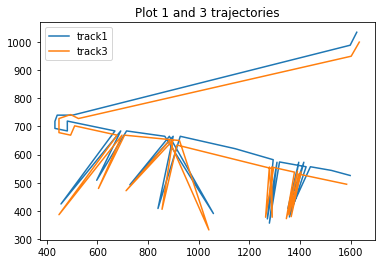

In [5]:
plt.plot(df_1.x, df_1.y, label='track1')
plt.plot(df_3.x, df_3.y, label='track3')
plt.title('Plot 1 and 3 trajectories')
plt.legend()
plt.show()

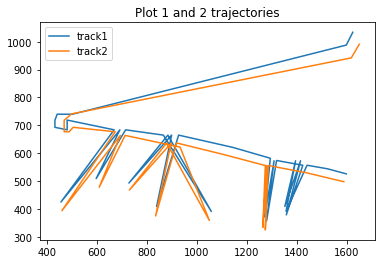

In [6]:
plt.plot(df_1.x, df_1.y, label='track1')
plt.plot(df_2.x, df_2.y, label='track2')
plt.title('Plot 1 and 2 trajectories')
plt.legend()
plt.show()

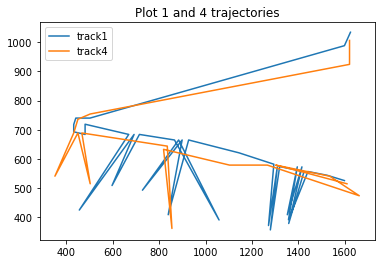

In [7]:
plt.plot(df_1.x, df_1.y, label='track1')
plt.plot(df_4.x, df_4.y, label='track4')
plt.title('Plot 1 and 4 trajectories')
plt.legend()
plt.show()

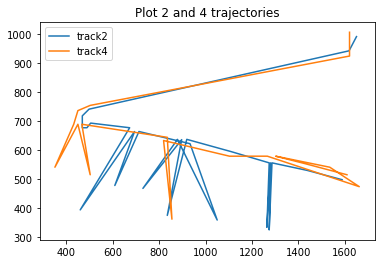

In [8]:
plt.plot(df_2.x, df_2.y, label='track2')
plt.plot(df_4.x, df_4.y, label='track4')
plt.title('Plot 2 and 4 trajectories')
plt.legend()
plt.show()

In [9]:
series1 = df_1[['x', 'y']].values
series2 = df_2[['x', 'y']].values
series3 = df_3[['x', 'y']].values
series4 = df_4[['x', 'y']].values

In [10]:
tracks = [series1, series2, series3, series4]

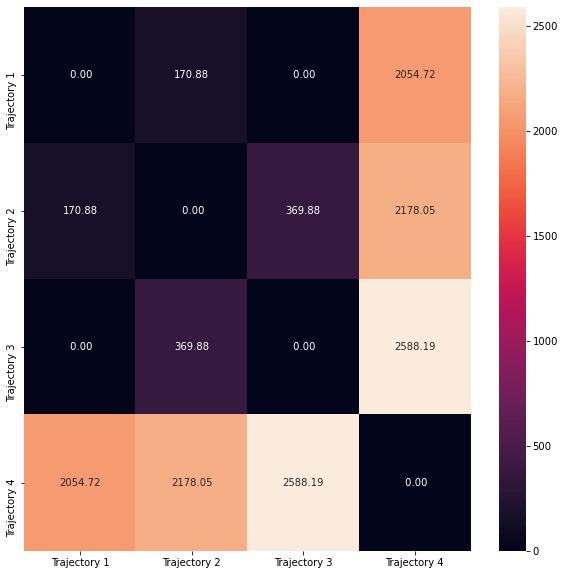

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
dists = np.zeros((4, 4))
for i, series_1 in enumerate(tracks):
    for j, series_2 in enumerate(tracks):
        dists[i, j] = dtw(series_1, series_2, dist=epsilon_norm)
        
dists = pd.DataFrame(data = dists, 
                     index = ['Trajectory 1', 'Trajectory 2', 'Trajectory 3', 'Trajectory 4'],
                    columns = ['Trajectory 1', 'Trajectory 2', 'Trajectory 3', 'Trajectory 4'])
        
ax = sns.heatmap(dists, annot=True, fmt = '5.2f')